In [1]:
# Versão das bibliotecas utilizadas neste projeto
## Remova o comentário caso seja necessário instalar alguma das bibliotecas
"""
# Python version== 3.9.12

! pip install pandas==1.4.2
! pip install numpy==1.21.5
! pip install matplotlib==3.51
"""

'\n# Python version== 3.9.12\n\n! pip install pandas==1.4.2\n! pip install numpy==1.21.5\n! pip install matplotlib==3.51\n'

## Carregamento das bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

## Carregamento do Dataset

In [3]:
dataset = 'data.xlsx'

df = pd.read_excel(dataset)
print(f"Tamanho do dataset: {df.shape}")

df.head()

Tamanho do dataset: (41107, 6)


,ID,Data Criação,Status,Proprietário,Data Fechamento,Atividades Concluídas
0,5049,2017-07-01,Perdido,Daniela Klipp Mannelli,2017-07-24,0
1,10652,2017-12-15,Perdido,Gabriel Brandt,2017-12-16,0
2,70850,2019-10-31,Ganho,Vinicius Furlan,2019-10-31,0
3,70851,2019-10-31,Ganho,Vinicius Furlan,2019-10-31,0
4,34,2017-02-17,Perdido,Fernanda Sawczyn,2017-05-11,2


## Avaliando o dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41107 entries, 0 to 41106
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     41107 non-null  int64         
 1   Data Criação           41107 non-null  datetime64[ns]
 2   Status                 41107 non-null  object        
 3   Proprietário           41107 non-null  object        
 4   Data Fechamento        37697 non-null  datetime64[ns]
 5   Atividades Concluídas  41107 non-null  int64         
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 1.9+ MB


In [5]:
df.loc[df['Data Fechamento'].isna()]

,ID,Data Criação,Status,Proprietário,Data Fechamento,Atividades Concluídas
11,100635,2020-05-06,Em aberto,Eduarda Matias,NaT,2
54,50240,2019-07-25,Em aberto,Dias,NaT,1
82,10093,2017-11-30,Em aberto,Digital,NaT,0
331,50284,2019-07-25,Em aberto,Digital,NaT,0
927,1899,2017-03-23,Em aberto,Fernanda Sawczyn,NaT,0
...,...,...,...,...,...,...
41102,101836,2020-05-21,Em aberto,Anderson Azevedo,NaT,0
41103,101839,2020-05-21,Em aberto,Anderson Azevedo,NaT,0
41104,101842,2020-05-21,Em aberto,Hendrik Machado,NaT,0
41105,101844,2020-05-21,Em aberto,Maic Freitas,NaT,0


In [6]:
df.loc[df['Status'] == 'Em aberto']

,ID,Data Criação,Status,Proprietário,Data Fechamento,Atividades Concluídas
11,100635,2020-05-06,Em aberto,Eduarda Matias,NaT,2
54,50240,2019-07-25,Em aberto,Dias,NaT,1
82,10093,2017-11-30,Em aberto,Digital,NaT,0
331,50284,2019-07-25,Em aberto,Digital,NaT,0
927,1899,2017-03-23,Em aberto,Fernanda Sawczyn,NaT,0
...,...,...,...,...,...,...
41102,101836,2020-05-21,Em aberto,Anderson Azevedo,NaT,0
41103,101839,2020-05-21,Em aberto,Anderson Azevedo,NaT,0
41104,101842,2020-05-21,Em aberto,Hendrik Machado,NaT,0
41105,101844,2020-05-21,Em aberto,Maic Freitas,NaT,0


> Verifica-se que os dados do tipo NaT em "Data Fechamento" são os que possuem Status = "Em aberto".

### Verficando a distribuição dos valores em "Atividades Concluídas"

In [7]:
print(df['Atividades Concluídas'].describe())

#sns.displot(df['Atividades Concluídas'], height=10);

count    41107.000000
mean         3.331111
std          3.798494
min          0.000000
25%          1.000000
50%          2.000000
75%          5.000000
max        120.000000
Name: Atividades Concluídas, dtype: float64


---

## Início das análises propostas

### 1 - Qual a conversão de vendas no mês de abr/2020?

In [8]:
filtro_ano = df['Data Fechamento'].dt.year == 2020
filtro_mes =  df['Data Fechamento'].dt.month == 4.0
cond1 = df['Status'] == "Ganho"

sum_ativ = df.loc[filtro_ano & filtro_mes]['Atividades Concluídas'].sum()
sum_ganho = df.loc[filtro_ano & filtro_mes & cond1]['Atividades Concluídas'].sum()

print(f"Somatório de todas as atividades de Abr/2020: {sum_ativ}\n"
f"Somatório de todos os ganhos de Abr/2020: {sum_ganho} \n"
f"Taxa de conversão de vendas ('Ganho'/total de negócios): {round(((sum_ganho/sum_ativ)*100), 1)}%")

Somatório de todas as atividades de Abr/2020: 8075
Somatório de todos os ganhos de Abr/2020: 1404 
Taxa de conversão de vendas ('Ganho'/total de negócios): 17.4%


In [9]:
# Em SQL:
'''
select 
    a.Ganho / sum(df.atividades_concluidas) 
from df join 
    (select 
        sum(atividades_concluidas) as Ganho, 
        Status 
    from df
    where 
        Status='Ganho' and year(data_fechamento) = 2020 and month(data_fechamento)= 4
    ) a 
where year(data_fechamento) = 2020 and month(data_fechamento) = 4
'''

"\nselect \n    a.Ganho / sum(df.atividades_concluidas) \nfrom df join \n    (select \n        sum(atividades_concluidas) as Ganho, \n        Status \n    from df\n    where \n        Status='Ganho' and year(data_fechamento) = 2020 and month(data_fechamento)= 4\n    ) a \nwhere year(data_fechamento) = 2020 and month(data_fechamento) = 4\n"

### 2 - Em qual mês de 2019 houve o maior número de negócios perdidos?

In [10]:
# Criando a coluna mes_fechamento no df
df['mes_fechamento'] = df['Data Fechamento'].dt.month

# Condicionais para o Filtro
cond_ano = df['Data Fechamento'].dt.year == 2019
cond_status = df['Status'] == 'Perdido'

print("Negócios perdidos de 2019, agrupados por mês")

# Visualizando dados agrupados por mês, no ano de 2019, com Status de perdido
df.loc[cond_ano & cond_status].groupby('mes_fechamento').sum().reset_index().sort_values(by='Atividades Concluídas', ascending=False)[['mes_fechamento', 'Atividades Concluídas']]

Negócios perdidos de 2019, agrupados por mês


,mes_fechamento,Atividades Concluídas
6,7.0,5325
5,6.0,5194
3,4.0,4998
2,3.0,4662
4,5.0,4281
1,2.0,4138
0,1.0,2429


In [11]:
# Em SQL:
"""
select
    month(data_fechamento) as mes,
    year(data_fechamento) as ano,
    sum(atividades_concluidas) as total_atividades
from df
where
    ano = 2019 and
    status = "Perdido"
group by 
    mes
order by
    total_atividades desc
"""

'\nselect\n    month(data_fechamento) as mes,\n    year(data_fechamento) as ano,\n    sum(atividades_concluidas) as total_atividades\nfrom df\nwhere\n    ano = 2019 and\n    status = "Perdido"\ngroup by \n    mes\norder by\n    total_atividades desc\n'

### 3 - Crie um gráfico com o total de vendas (negócios com status "Ganho") mensal dos anos 2019 e 2020, com uma linha de tendência linear.

In [12]:
df['ano_fechamento'] = df['Data Fechamento'].dt.year

# Filtros
ano_ini = df['Data Fechamento'].between('2019-01', '2020-12') 
cond_status = df['Status'] == 'Ganho'

df3 = df.loc[ano_ini & cond_status].groupby(['ano_fechamento', 'mes_fechamento']).sum().reset_index().drop(['ID'], axis=1)

lista=[]
for x, i in zip(df3['ano_fechamento'],df3['mes_fechamento']):
    lista.append((str(x)+str(i)).replace('.','-')[0:7])

df3['ano_mes'] = lista

df3

,ano_fechamento,mes_fechamento,Atividades Concluídas,ano_mes
0,2019.0,1.0,932,2019-01
1,2019.0,2.0,940,2019-02
2,2019.0,3.0,886,2019-03
3,2019.0,4.0,1051,2019-04
4,2019.0,5.0,1044,2019-05
5,2019.0,6.0,1627,2019-06
6,2019.0,7.0,2431,2019-07
7,2019.0,8.0,2918,2019-08
8,2019.0,9.0,2834,2019-09
9,2019.0,10.0,2515,2019-01


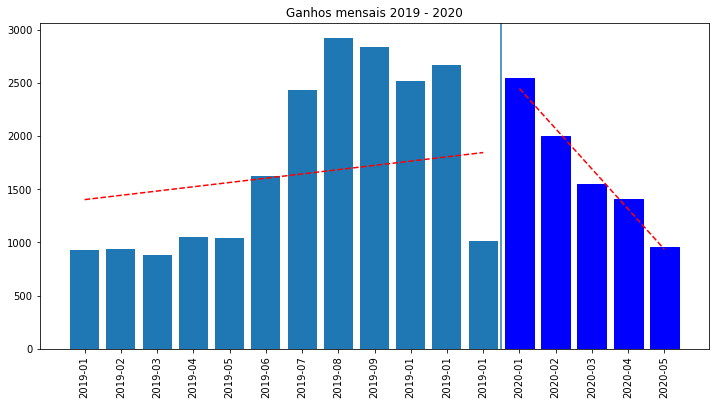

In [13]:
plt.figure(figsize=(12,6))
plt.xticks(df3.index, df3['ano_mes'], rotation=90)
plt.title("Ganhos mensais 2019 - 2020")

# Linha tendência 2019
z = np.polyfit(df3.index, df3['Atividades Concluídas'], 1)
p = np.poly1d(z)

# Linha tendência 2020
y = np.polyfit(df3[df3['ano_fechamento']==2020].index, df3['Atividades Concluídas'][df3['ano_fechamento']==2020], 1)
v = np.poly1d(y)

# Plotando gráfico de barras
patches=plt.bar(x=df3.index,height=df3['Atividades Concluídas'])
for i in range(len(df3.index)):
    if i >=12:
        patches[i].set_color("blue")

# Plotando linhas de tendência
plt.plot(df3[df3['ano_fechamento']==2019].index, p(df3[df3['ano_fechamento']==2019].index),"r--")
plt.plot(df3[df3['ano_fechamento']==2020].index, v(df3[df3['ano_fechamento']==2020].index),"r--")

plt.axvline(11.5)


### 4 - Em qual dia da semana ocorreu o maior número de vendas no mês de fev/2020?

In [14]:
dias_ptbr = {'Monday': 'Segunda-feira', 'Saturday': 'Sábado', 
    'Thursday': 'Quinta-feira', 'Friday': 'Sexta-feira', 'Tuesday': 'Terça-feira', 
    'nan': np.nan, 'Wednesday': 'Quarta-feira', 'Sunday': 'Domingo'}

df['dia_semana_fechamento'] = df['Data Fechamento'].dt.day_name().replace(dias_ptbr)

In [15]:
filtro_mes = df['mes_fechamento'] == 2.0
filtro_ano = df['ano_fechamento'] == 2020.0
filtro_status = df['Status'] == 'Ganho'

df.loc[filtro_mes & filtro_ano & filtro_status].groupby('dia_semana_fechamento')[['dia_semana_fechamento', 'Atividades Concluídas']].sum().sort_values('Atividades Concluídas', ascending=False).reset_index()

,dia_semana_fechamento,Atividades Concluídas
0,Sexta-feira,719
1,Quinta-feira,472
2,Segunda-feira,292
3,Quarta-feira,278
4,Terça-feira,227
5,Domingo,6
6,Sábado,6


In [16]:
# Em SQL:
"""
select
    weekday(data_fechamento) as weekday,
    sum(atividades_concluidas) as total_atividades
from df
where
    month(data_fechamento) = 2 and
    year(data_fechaemnto) = 2020 and
    status = 'Ganho'
group by
    weekday
order by
    total_atividades desc
"""

"\nselect\n    weekday(data_fechamento) as weekday,\n    sum(atividades_concluidas) as total_atividades\nfrom df\nwhere\n    month(data_fechamento) = 2 and\n    year(data_fechaemnto) = 2020 and\n    status = 'Ganho'\ngroup by\n    weekday\norder by\n    total_atividades desc\n"

### 5 - Qual o tempo médio em dias do fechamento dos negócios em jan/2020?

In [17]:
df['timediff_fechamento'] = df['Data Fechamento'] - df['Data Criação']

In [18]:
# Filtrnado o período
filtro_mes = df['mes_fechamento'] == 1.0
filtro_ano = df['ano_fechamento'] == 2020.0

# Removendo outliers, conforme regra entre quartis
## Variáveis auxiliares
q1 = df.loc[filtro_mes & filtro_ano]['timediff_fechamento'].quantile(0.25)
q3 = df.loc[filtro_mes & filtro_ano]['timediff_fechamento'].quantile(0.75)
aq = q3 - q1
# Filtros
filtro_q1 =  df['timediff_fechamento'] > q1 - (aq * 1.5)
filtro_q3 = df['timediff_fechamento'] <= q3 + (aq * 1.5)

# Estatísticas básicas dos dados filtrados
print(df.loc[filtro_mes & filtro_ano & filtro_q1 & filtro_q3]['timediff_fechamento'].describe())

media_periodo = df.loc[filtro_mes & filtro_ano & filtro_q1 & filtro_q3]['timediff_fechamento'].mean()
print(f"\n\nA Média para o perído citado é de {(media_periodo.days)} dias.")

count                          409
mean     6 days 00:49:17.457212713
std      7 days 12:39:20.699203163
min              -1 days +00:00:00
25%                0 days 00:00:00
50%                4 days 00:00:00
75%                9 days 00:00:00
max               33 days 00:00:00
Name: timediff_fechamento, dtype: object


A Média para o perído citado é de 6 dias.


In [19]:
# Em SQL:
"""
select
    avg(datediff(data_fechamento, data_criacao))
from df
where
    month(data_fechamento) = 1 and
    year(data_fechamento) = 2020
"""

'\nselect\n    avg(datediff(data_fechamento, data_criacao))\nfrom df\nwhere\n    month(data_fechamento) = 1 and\n    year(data_fechamento) = 2020\n'

### 6 - Qual proprietário possui a maior média de atividades concluídas em 2019?(Considere proprietários com mais de 40 negócios)

In [20]:
filtro_status = df['Status'] != 'Em aberto'
filtro_ano = df['ano_fechamento'] == 2019.0

concluida_gt40 = df.loc[filtro_status & filtro_ano].groupby('Proprietário').agg({'Atividades Concluídas': ['count', 'mean']}).reset_index()
concluida_gt40.loc[concluida_gt40['Atividades Concluídas']['count'] > 40].sort_values(('Atividades Concluídas', 'mean'), ascending=False)

Proprietário Atividades Concluídas           
                                            count       mean
20           Rafael Fontana                    53  10.547170
16             Maic Freitas                    60   8.516667
17             Michel Vidal                    49   8.020408
0            Adriano Santos                   158   6.702532
24          Vinicius Furlan                  1097   6.313582
1          Anderson Azevedo                   262   6.236641
10          Gustavo Camargo                   238   6.147059
14           Lari Brandeker                   909   5.698570
22         Thaynara Carriel                  1914   4.926332
18                   Munhoz                   403   4.813896
3    Daniela Klipp Mannelli                   829   4.324487
7               Felipe Ruiz                   991   3.384460
8   Fernando Oliveira Mello                    67   3.298507
12           Hélio Ferreira                  1615   3.159752
19       Muriel Le Senechal                  1493   2.741460
4                      Dias                  1917   2.617632
5                   Digital                   443   1.241535

In [21]:
# Em SQL:
"""
select * 
from 
    (select proprietario,
    avg(atividades_concluidas) as media_concluidas,
    count(atividades_concluidas) as qtd_atividades 
    from df
    where 
        status != 'Em aberto' and
        year(data_fechamento) = 2019
    group by proprietario) a
where qtd_atividades >=40
order by media_concluidas desc
"""

"\nselect * \nfrom \n    (select proprietario,\n    avg(atividades_concluidas) as media_concluidas,\n    count(atividades_concluidas) as qtd_atividades \n    from df\n    where \n        status != 'Em aberto' and\n        year(data_fechamento) = 2019\n    group by proprietario) a\nwhere qtd_atividades >=40\norder by media_concluidas desc\n"

### 7 - Crie uma análise estatística da base de dados no ano de 2020 com abertura por mês (Utilize médias, correlação, quartil e mais funções que julgar relevantes)

In [22]:
# Criando as colunas de Ano e mês da data de criação
df['mes_criacao'] = df['Data Criação'].dt.month
df['ano_criacao'] = df['Data Criação'].dt.year

In [23]:
# Filtro
filtro_ano = df['ano_criacao'] == 2020.0

# Criando df com as principais estástisticas de 2020
df_2020 = df.loc[filtro_ano].groupby(['mes_criacao', 'Status'])['Atividades Concluídas'].describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]).reset_index()

# Acrescentando a coluna de somatório de ocorrência do Status no período
df_2020['sum_periodo'] = df.loc[filtro_ano].groupby(['mes_criacao', 'Status'])['Atividades Concluídas'].agg('sum').reset_index()['Atividades Concluídas']

In [24]:
# Filtros
filtro_status_aberto = df['Status'] == 'Em aberto'
total_aberto = df.loc[filtro_ano & filtro_status_aberto]['Atividades Concluídas'].sum()

filtro_status_ganho = df['Status'] == 'Ganho'
total_ganho = df.loc[filtro_ano & filtro_status_ganho]['Atividades Concluídas'].sum()

filtro_status_perdido = df['Status'] == 'Perdido'
total_perdido = df.loc[filtro_ano & filtro_status_perdido]['Atividades Concluídas'].sum()

# Criando nova coluna indicando o quanto o total de atividades nos mês representa no ano
df_2020.loc[df_2020['Status']=='Em aberto', 'proporcao_periodo'] = df_2020['sum_periodo']/total_aberto
df_2020.loc[df_2020['Status']=='Ganho', 'proporcao_periodo'] = df_2020['sum_periodo']/total_ganho
df_2020.loc[df_2020['Status']=='Perdido', 'proporcao_periodo'] = df_2020['sum_periodo']/total_perdido

In [25]:
df_2020

,mes_criacao,Status,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max,sum_periodo,proporcao_periodo
0,1,Em aberto,38.0,6.578947,5.745182,0.0,0.37,1.00,2.00,5.0,8.75,17.60,21.00,21.0,250,0.038432
1,1,Ganho,445.0,4.865169,4.331404,0.0,0.00,0.00,2.00,4.0,7.00,12.00,18.56,42.0,2165,0.346733
2,1,Perdido,40.0,8.875000,4.952013,3.0,3.00,3.00,5.75,7.0,11.00,20.00,21.83,23.0,355,0.027139
3,2,Em aberto,92.0,8.141304,6.946549,0.0,0.00,0.00,2.75,7.0,12.00,21.45,33.00,33.0,749,0.115142
4,2,Ganho,314.0,4.242038,4.329705,0.0,0.00,0.65,1.00,3.0,5.00,11.35,17.87,38.0,1332,0.213325
5,2,Perdido,388.0,5.103093,3.327855,0.0,1.00,2.00,3.00,4.0,6.00,12.00,18.13,22.0,1980,0.151365
6,3,Em aberto,329.0,7.328267,5.802792,0.0,0.00,1.00,3.00,6.0,10.00,17.00,25.72,46.0,2411,0.370638
7,3,Ganho,233.0,6.562232,5.840313,0.0,0.00,0.00,2.00,5.0,9.00,18.00,24.68,37.0,1529,0.244875
8,3,Perdido,1525.0,4.765902,3.135964,0.0,0.00,1.00,3.00,4.0,6.00,11.00,16.00,28.0,7268,0.555615
9,4,Em aberto,416.0,4.254808,3.287431,0.0,0.00,0.00,2.00,3.0,6.00,10.25,15.85,20.0,1770,0.272098


### 8 - Analisando o evolutivo mensal dos negócios do período entre jan/19 e jul/19, qual o índice de correlação apresentado entre o total de negócios e o total de negócios perdidos? A partir desse índice é possível afirmar que há uma relação entre esses dois indicadores? Justifique.

In [26]:
filtro_ano = df['ano_fechamento'] == 2019.0
filtro_mes_inicio = df['mes_fechamento'] >= 1.0
filtro_mes_fim = df['mes_fechamento'] <= 7.0

# Criando df com as principais estástisticas de 2020
df_2019 = df.loc[filtro_ano & filtro_mes_inicio & filtro_mes_fim].groupby(['mes_fechamento', 'Status'])['Atividades Concluídas'].sum().reset_index()

# Pivotando valores de Status das atividades
df_2019 = df_2019.pivot_table(index='mes_fechamento', columns=['Status'], values=['Atividades Concluídas']).reset_index(col_level=1)

# Criando nova coluna com o somatório de atividades concluídas no mês
df_2019['Total_atividade'] = df_2019['Atividades Concluídas']['Ganho'] + df_2019['Atividades Concluídas']['Perdido']

df_2019

Atividades Concluídas         Total_atividade
Status mes_fechamento                 Ganho Perdido                
0                 1.0                   932    2429            3361
1                 2.0                   940    4138            5078
2                 3.0                   886    4662            5548
3                 4.0                  1051    4998            6049
4                 5.0                  1044    4281            5325
5                 6.0                  1627    5194            6821
6                 7.0                  2431    5325            7756

In [27]:
df_2019.corr()

Atividades Concluídas  \
Status                               mes_fechamento                 Ganho   
                      Status                                                
                      mes_fechamento       1.000000              0.816982   
Atividades Concluídas Ganho                0.816982              1.000000   
                      Perdido              0.812516              0.563578   
Total_atividade                            0.911595              0.809530   

                                               Total_atividade  
Status                                 Perdido                  
                      Status                                    
                      mes_fechamento  0.812516        0.911595  
Atividades Concluídas Ganho           0.563578        0.809530  
                      Perdido         1.000000        0.941197  
Total_atividade                       0.941197        1.000000

> Observando a correlação entre o total de atividade [Total_atividade] e as atividades concluídas, classificadas como perdido, vê-se um coeficiente de 0.94 indicando alta correlação positiva entre as duas variáveis. 
<br><br>
O índice por sí só, apesar de alto, não indica uma correlação entre os dois, porém sabe-se que as atividades classificadas como "Perdido", compõem a quantidade total de atividades do mês, logo as duas possuem sim relação uma com a outra.

### 9 - Analisando os dados históricos, crie uma projeção do total vendas para o mês de mai/2020. Explique como o cálculo foi realizado e quais parâmetros foram levados em consideração para a criação da projeção.

Analisando as estátisticas básicas quanto a diferença de tempo entre as datas de criação e fechamento das atividades.

In [28]:
print("Atividades em aberto:")
df[df['Status'] == 'Em aberto']['Atividades Concluídas'].count()

Atividades em aberto:


3410

In [29]:
df.groupby(['Status'])['timediff_fechamento'].describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.8, 0.9, 0.95, 0.99]).T

Status,Em aberto,Ganho,Perdido
count,0,8497,29200
mean,NaT,28 days 17:26:39.388019301,48 days 13:18:48.328767123
std,NaT,75 days 20:52:00.173881617,74 days 05:27:20.751742056
min,NaT,-688 days +00:00:00,-490 days +00:00:00
1%,NaT,-2 days +00:00:00,0 days 00:00:00
5%,NaT,0 days 00:00:00,0 days 00:00:00
25%,NaT,1 days 00:00:00,6 days 00:00:00
50%,NaT,7 days 00:00:00,23 days 00:00:00
75%,NaT,22 days 00:00:00,55 days 00:00:00
80%,NaT,29 days 00:00:00,66 days 00:00:00


> **80% das minhas atividades onde há ganho, ocorrem em até 29 dias.**

#### Proporção de atividades ganhas em todo o histórico de dados

In [30]:
# Proporção de atividades ganhas em todo o histórico de dados
## Filtros
total_ativ_concluidas = df[df['Status'] != 'Em aberto'].groupby('Status')['Atividades Concluídas'].sum().sum()
total_ativ_ganho = df[df['Status'] != 'Em aberto'].groupby('Status')['Atividades Concluídas'].sum()[0]

## A proporção
prop_ganho = total_ativ_ganho / total_ativ_concluidas
print(f"Proporção de atividades com status 'Ganho' em todo o histórico de dados: {round(prop_ganho, 3)*100}%")

Proporção de atividades com status 'Ganho' em todo o histórico de dados: 34.1%


#### Total de atividades 'Em aberto' que foram criadas até 29 dias antes do início de Maio

In [31]:
# Filtros
filtro_data = df['Data Criação'] + pd.DateOffset(days=29) >= "2020-05-01"
filtro_status = df['Status'] == 'Em aberto'

# Total de atividades 'Em aberto' que foram criadas até 29 dias antes do início de Maio
tot_ativ_aberta = round(df.loc[filtro_data & filtro_status]['Atividades Concluídas'].sum())

(f"Total de atividades abertas até 29 dias antes do início de Maio/2020: {tot_ativ_aberta}")

'Total de atividades abertas até 29 dias antes do início de Maio/2020: 3011'

#### Projeção de atividades que serão concluídas como 'Ganho'

In [32]:
projetado_maio_2020 = round((tot_ativ_aberta * prop_ganho * 0.80))
print(f"Projeção de atividades que serão concluídas como 'Ganho' para o mês de Maio/2020: {projetado_maio_2020}")

Projeção de atividades que serão concluídas como 'Ganho' para o mês de Maio/2020: 821


#### Total de atividades concluídas como 'Ganho' - Maio/2020

In [33]:
# Filtro dados de Maio com Status de Ganho já definido
filtro_status = df['Status'] == 'Ganho'
filtro_mes = df['mes_fechamento'] == 5.0
filtro_ano = df['ano_fechamento'] == 2020.0

# Total de atividades concluídas como 'Ganho' - Maio/2020
total_ganho_maio_2020 = round(df.loc[filtro_mes & filtro_ano & filtro_status]['Atividades Concluídas'].sum())
print(f"Atividades já concluídas com o status 'Ganho' em Maio/2020: {total_ganho_maio_2020}")

Atividades já concluídas com o status 'Ganho' em Maio/2020: 956


#### Atividades projetadas como 'Ganho' + atividades já concluídas para Maio/2020

In [34]:
# Atividades projetadas como 'Ganho' + atividades já concluídas para Maio/2020

total_projetado_maio_2020 = round(projetado_maio_2020 + total_ganho_maio_2020)
print(f"Projeção do total de atividades para o mês de Maio/2020: {total_projetado_maio_2020}")

Projeção do total de atividades para o mês de Maio/2020: 1777


#### Descrição dos resultados da projeção Maio/2020

In [35]:
print(f"Considerando o histórico dos dados, 80% das atividades onde há o status 'Ganho' são concluídas em até 29 dias da data de criação.\n"
    f" Dessa forma, separando os dados que foram criados 29 dias antes do início de Maio, estima-se que"
    f" o mês de Maio/2020 tenha um total de {total_projetado_maio_2020}, sendo {total_ganho_maio_2020} dessas atividades já definidas como 'Ganho'.")

Considerando o histórico dos dados, 80% das atividades onde há o status 'Ganho' são concluídas em até 29 dias da data de criação.
 Dessa forma, separando os dados que foram criados 29 dias antes do início de Maio, estima-se que o mês de Maio/2020 tenha um total de 1777, sendo 956 dessas atividades já definidas como 'Ganho'.


---

### Abordagem alternativa, baseada na sazonalidade dos dados

> Apresentando a soma de valores [Ganho e Perdido] para cada mês e a proporção para cada status, em relação aos anos de 2017 a 2020

In [36]:
# Objetivo: criar um df que demonstre a proporção de [ganho e perdido] atividades, dessa forma posso estimar quanto dos negócios ainda aberto serão "ganho"
df_projec = df.groupby(['mes_fechamento', 'Status']).sum().reset_index()

# Pivotamento dos dados
df_projec = df_projec.pivot_table(index='mes_fechamento', values='Atividades Concluídas', columns='Status').reset_index(col_level=1)

# Criação de novas colunas para facilitar a análise
df_projec['sum_ativ'] = df_projec['Ganho'] + df_projec['Perdido']
df_projec['porc_ganho'] = round(df_projec['Ganho'] / df_projec['sum_ativ'], 2)
df_projec['porc_perdido'] = round(df_projec['Perdido'] / df_projec['sum_ativ'], 2)

df_projec

Status,mes_fechamento,Ganho,Perdido,sum_ativ,porc_ganho,porc_perdido
0,1.0,4075,3414,7489,0.54,0.46
1,2.0,3661,5972,9633,0.38,0.62
2,3.0,3170,12112,15282,0.21,0.79
3,4.0,3363,14355,17718,0.19,0.81
4,5.0,3174,10794,13968,0.23,0.77
5,6.0,3019,8330,11349,0.27,0.73
6,7.0,3686,9327,13013,0.28,0.72
7,8.0,4215,3458,7673,0.55,0.45
8,9.0,4231,4643,8874,0.48,0.52
9,10.0,4260,5323,9583,0.44,0.56


#### Verificando a relação de vendas históricas entre Abril e Maio

In [37]:
prop_vendas_abr_maio = int(df_projec[df_projec['mes_fechamento'] == 5.0]['sum_ativ']) / int( df_projec[df_projec['mes_fechamento'] == 4.0]['sum_ativ'])
print(f"As vendas para o mês de Maio representam em média {round(prop_vendas_abr_maio, 3)*100}% das vendas de Abril")

As vendas para o mês de Maio representam em média 78.8% das vendas de Abril


> Verificou-se historicamente que as vendas de Maio representam 78,8% das vendas de Abril.<br>
Baseado no somatório de atividades concluídas de Abril/2020, estima-se que de 78,8% desse montante, 23% será de atividades concluídas como 'Ganho'

In [38]:
prop_ganho_maio = float(df_projec[df_projec['mes_fechamento'] == 5.0]['porc_ganho'])

filtro_mes = df['mes_fechamento'] == 4.0
filtro_ano = df['ano_fechamento'] == 2020.0

projec_saz_maio_2020 = round(df.loc[filtro_mes & filtro_ano]['Atividades Concluídas'].sum() * prop_vendas_abr_maio * prop_ganho_maio)

print(f"Considerando a proporção histórica de Ganho e Perda para o mês de Maio, estima-se um total de {projec_saz_maio_2020} atividades concluídas como Ganho para o mês de Maio/2020")

Considerando a proporção histórica de Ganho e Perda para o mês de Maio, estima-se um total de 1464 atividades concluídas como Ganho para o mês de Maio/2020
